<a href="https://colab.research.google.com/github/rivkms/atp_ai/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#github에서 프로젝트 파일 가져오기

In [51]:
import os
import shutil
if(os.path.isdir("atp_ai")):
    shutil.rmtree("atp_ai")

In [52]:
!git clone "https://github.com/rivkms/atp_ai"

Cloning into 'atp_ai'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 68 (delta 35), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (68/68), done.


In [53]:
# kaggle.json 파일을 적절한 디렉토리로 이동
!mkdir -p ~/.kaggle
!cp atp_ai/kaggle.json ~/.kaggle/

# Permission Warning 이 일어나지 않도록 함 
!chmod 600 ~/.kaggle/kaggle.json

In [54]:
# earthquake-magnitude-damage-and-impact 데이터셋 다운로드
!kaggle datasets download -d arashnic/earthquake-magnitude-damage-and-impact

earthquake-magnitude-damage-and-impact.zip: Skipping, found more recently modified local copy (use --force to force download)


In [55]:
# zip파일 압축 해제 후 현재 디렉토리의 파일 리스트 보기
!unzip earthquake-magnitude-damage-and-impact.zip
!ls

Archive:  earthquake-magnitude-damage-and-impact.zip
replace csv_building_damage_assessment.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: csv_building_damage_assessment.csv  y
y
y
y
y

replace csv_building_ownership_and_use.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: csv_building_ownership_and_use.csv  y
y

replace csv_building_structure.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: csv_building_structure.csv  y
y
y

replace csv_household_demographics.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: csv_household_demographics.csv  
replace csv_household_earthquake_impact.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: csv_household_earthquake_impact.csv  
replace csv_household_resources.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: csv_household_resources.csv  
replace csv_individual_demographics.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: csv_individual_demographics.csv  
replace mapping.csv? [y]es, [n]o, [A]ll, [N

In [56]:
#데이터 불러오기

In [57]:
import numpy as np
import pandas as pd

# csv 파일을 pandas dataframe으로 읽기
#data = pd.read_csv('./dataset/csv_building_structure.csv')
data = pd.read_csv('/content/csv_building_structure.csv')
# 상위 5개 행 출력
data.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [ ]:
#데이터 전처리 시작

In [58]:
del1 = ['building_id', 'district_id', 'vdcmun_id', 'ward_id', 'count_floors_pre_eq', 'count_floors_post_eq', 'height_ft_post_eq']
del2 = ['roof_type', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag']
del3 = ['has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo']
del4 = ['has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'condition_post_eq', 'technical_solution_proposed']

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762106 non-null  int64 
 1   district_id                             762106 non-null  int64 
 2   vdcmun_id                               762106 non-null  int64 
 3   ward_id                                 762106 non-null  int64 
 4   count_floors_pre_eq                     762106 non-null  int64 
 5   count_floors_post_eq                    762106 non-null  int64 
 6   age_building                            762106 non-null  int64 
 7   plinth_area_sq_ft                       762106 non-null  int64 
 8   height_ft_pre_eq                        762106 non-null  int64 
 9   height_ft_post_eq                       762106 non-null  int64 
 10  land_surface_condition                  762106 non-null 

In [60]:
for n in del1:
  data.drop(n, axis=1, inplace = True)
for n in del2:
  data.drop(n, axis=1, inplace = True)
for n in del3:
  data.drop(n, axis=1, inplace = True)
for n in del4:
  data.drop(n, axis=1, inplace = True)
data.head()

,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,ground_floor_type,other_floor_type,position,damage_grade
0,9,288,9,Flat,Other,Mud,Not applicable,Not attached,Grade 3
1,15,364,9,Flat,Other,Mud,Not applicable,Not attached,Grade 5
2,20,384,9,Flat,Other,Mud,Not applicable,Not attached,Grade 2
3,20,312,9,Flat,Other,Mud,Not applicable,Not attached,Grade 2
4,30,308,9,Flat,Other,Mud,Not applicable,Not attached,Grade 1


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   age_building            762106 non-null  int64 
 1   plinth_area_sq_ft       762106 non-null  int64 
 2   height_ft_pre_eq        762106 non-null  int64 
 3   land_surface_condition  762106 non-null  object
 4   foundation_type         762106 non-null  object
 5   ground_floor_type       762106 non-null  object
 6   other_floor_type        762106 non-null  object
 7   position                762105 non-null  object
 8   damage_grade            762094 non-null  object
dtypes: int64(3), object(6)
memory usage: 52.3+ MB


In [62]:
data.isna().sum()

age_building               0
plinth_area_sq_ft          0
height_ft_pre_eq           0
land_surface_condition     0
foundation_type            0
ground_floor_type          0
other_floor_type           0
position                   1
damage_grade              12
dtype: int64

In [63]:
data1 = data.dropna()
data1.isna().sum()

age_building              0
plinth_area_sq_ft         0
height_ft_pre_eq          0
land_surface_condition    0
foundation_type           0
ground_floor_type         0
other_floor_type          0
position                  0
damage_grade              0
dtype: int64

In [64]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762094 entries, 0 to 762105
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   age_building            762094 non-null  int64 
 1   plinth_area_sq_ft       762094 non-null  int64 
 2   height_ft_pre_eq        762094 non-null  int64 
 3   land_surface_condition  762094 non-null  object
 4   foundation_type         762094 non-null  object
 5   ground_floor_type       762094 non-null  object
 6   other_floor_type        762094 non-null  object
 7   position                762094 non-null  object
 8   damage_grade            762094 non-null  object
dtypes: int64(3), object(6)
memory usage: 58.1+ MB


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

15     49983
20     46525
10     39794
25     37063
12     36458
       ...  
138        1
146        1
136        1
144        1
148        1
Name: age_building, Length: 176, dtype: int64

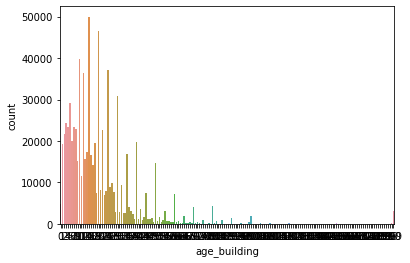

In [66]:
sns.countplot(data=data, x='age_building')
data1.loc[:,'age_building'].value_counts()

Not attached       604443
Attached-1 side    129431
Attached-2 side     26910
Attached-3 side      1310
Name: position, dtype: int64

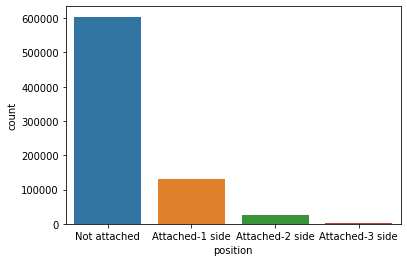

In [67]:
sns.countplot(data=data, x='position')
data1.loc[:,'position'].value_counts()

Grade 5    275766
Grade 4    183844
Grade 3    136412
Grade 2     87257
Grade 1     78815
Name: damage_grade, dtype: int64

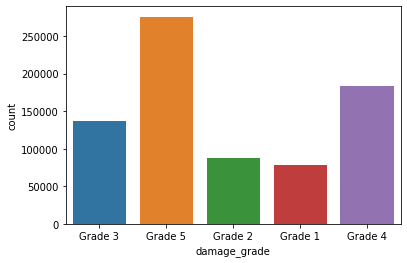

In [68]:
sns.countplot(data=data, x='damage_grade')
data1.loc[:,'damage_grade'].value_counts()

In [69]:
data1['damage_grade']

0         Grade 3
1         Grade 5
2         Grade 2
3         Grade 2
4         Grade 1
           ...   
762101    Grade 5
762102    Grade 5
762103    Grade 5
762104    Grade 5
762105    Grade 5
Name: damage_grade, Length: 762094, dtype: object

In [70]:
# data2=data1['damage_grade'].replace({'Grade 1':1, 'Grade 2':2,'Grade 3':3,'Grade 4':4,'Grade 5':5,}, inplace=True)
data2=data1.replace({'Grade 1':1, 'Grade 2':2,'Grade 3':3,'Grade 4':4,'Grade 5':5,}, inplace=False)
data2.head()

,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,ground_floor_type,other_floor_type,position,damage_grade
0,9,288,9,Flat,Other,Mud,Not applicable,Not attached,3
1,15,364,9,Flat,Other,Mud,Not applicable,Not attached,5
2,20,384,9,Flat,Other,Mud,Not applicable,Not attached,2
3,20,312,9,Flat,Other,Mud,Not applicable,Not attached,2
4,30,308,9,Flat,Other,Mud,Not applicable,Not attached,1


In [71]:
data2['position'].unique()

array(['Not attached', 'Attached-1 side', 'Attached-2 side',
       'Attached-3 side'], dtype=object)

In [72]:
# data2=data1['damage_grade'].replace({'Grade 1':1, 'Grade 2':2,'Grade 3':3,'Grade 4':4,'Grade 5':5,}, inplace=True)
data2=data2.replace({"Attached-1 side":1, "Attached-2 side":2, "Attached-3 side":3, "Not attached":0, }, inplace=False)

data2.head()

,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,ground_floor_type,other_floor_type,position,damage_grade
0,9,288,9,Flat,Other,Mud,Not applicable,0,3
1,15,364,9,Flat,Other,Mud,Not applicable,0,5
2,20,384,9,Flat,Other,Mud,Not applicable,0,2
3,20,312,9,Flat,Other,Mud,Not applicable,0,2
4,30,308,9,Flat,Other,Mud,Not applicable,0,1


In [73]:
data2["land_surface_condition"].value_counts()

Flat              631663
Moderate slope    105640
Steep slope        24791
Name: land_surface_condition, dtype: int64

In [74]:
data2['land_surface_condition'].unique()

array(['Flat', 'Moderate slope', 'Steep slope'], dtype=object)

In [75]:
data2["land_surface_condition"].describe()

count     762094
unique         3
top         Flat
freq      631663
Name: land_surface_condition, dtype: object

In [76]:
data2["foundation_type"].value_counts()

Mud mortar-Stone/Brick    628705
Bamboo/Timber              57472
Cement-Stone/Brick         39245
RC                         32120
Other                       4552
Name: foundation_type, dtype: int64

In [77]:
data2["ground_floor_type"].value_counts()

Mud            618205
RC              73149
Brick/Stone     66093
Timber           3594
Other            1053
Name: ground_floor_type, dtype: int64

In [78]:
data2["other_floor_type"].value_counts()

TImber/Bamboo-Mud    486907
Timber-Planck        123624
Not applicable       118821
RCC/RB/RBC            32742
Name: other_floor_type, dtype: int64

In [79]:
data2['other_floor_type'].unique()

array(['Not applicable', 'TImber/Bamboo-Mud', 'Timber-Planck',
       'RCC/RB/RBC'], dtype=object)

In [80]:
data3 = pd.get_dummies(data2, columns=["land_surface_condition", "foundation_type", "ground_floor_type", "other_floor_type"])
data3.head(10)

,age_building,plinth_area_sq_ft,height_ft_pre_eq,position,damage_grade,land_surface_condition_Flat,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,foundation_type_Bamboo/Timber,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_Other,foundation_type_RC,ground_floor_type_Brick/Stone,ground_floor_type_Mud,ground_floor_type_Other,ground_floor_type_RC,ground_floor_type_Timber,other_floor_type_Not applicable,other_floor_type_RCC/RB/RBC,other_floor_type_TImber/Bamboo-Mud,other_floor_type_Timber-Planck
0,9,288,9,0,3,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,15,364,9,0,5,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,20,384,9,0,2,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,20,312,9,0,2,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4,30,308,9,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
5,18,216,9,0,2,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
6,13,234,9,0,5,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
7,8,280,9,0,2,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
8,22,268,9,0,3,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
9,10,268,9,0,3,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


In [81]:
#코드 통합으로 필요없어진 코드
# land_surface_condition_dummies = pd.get_dummies(data2['land_surface_condition'])
# land_surface_condition_dummies.head(10)
# foundation_type_dummies = pd.get_dummies(data2['foundation_type'])
# foundation_type_dummies.head(10)
# ground_floor_type_dummies = pd.get_dummies(data2['ground_floor_type'])
# ground_floor_type_dummies.head(10)
# other_floor_type_dummies = pd.get_dummies(data2['other_floor_type'])
# other_floor_type_dummies.head(10)

In [82]:
#코드 통합으로 필요없어진 코드
# insurance_data에 region_dummies 결합 및 기존 region 열 삭제
# data2 = pd.concat([data2, land_surface_condition_dummies], axis = 1)
# data2.drop(['land_surface_condition'], axis = 1, inplace = True)
# data2 = pd.concat([data2, foundation_type_dummies], axis = 1)
# data2.drop(['foundation_type'], axis = 1, inplace = True)
# data2 = pd.concat([data2, ground_floor_type_dummies], axis = 1)
# data2.drop(['ground_floor_type'], axis = 1, inplace = True)
# data2 = pd.concat([data2, other_floor_type_dummies], axis = 1)
# data2.drop(['other_floor_type'], axis = 1, inplace = True)
# data2.head()

In [ ]:
#데이터 전처리 끝

In [ ]:
#머신러닝 회귀 방법 이용 인공지능

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y_target =data3['damage_grade']
x_feature = data3.drop(['damage_grade'],axis=1,inplace=False)

x_train, x_test, y_train, y_test= train_test_split(x_feature, y_target,test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(x_train,y_train)
pred = lr_reg.predict(x_test)

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# MSE, RMSE, MAE 계산

def model_evaluate(y, pred):
    MSE_val = mean_squared_error(y, pred)
    RMSE_val = np.sqrt(MSE_val)
    MAE_val = mean_absolute_error(y, pred)

    print('MSE: {0:.3f}, RMSE: {1:.3F}, MAE:{2:.3F}'.format(MSE_val,RMSE_val, MAE_val))

model_evaluate(y_test,pred)

MSE: 1.313, RMSE: 1.146, MAE:0.930


In [ ]:
#머신러닝 회귀 방법 이용 인공지능 끝

In [ ]:
#딥러닝 회귀 방법 이용 인공지능 시작

In [85]:
# 필요한 라이브러리 호출
import numpy as np
import pandas as pd
seed = 7
np.random.seed(seed)

from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [86]:
data3.describe()

,age_building,plinth_area_sq_ft,height_ft_pre_eq,position,damage_grade,land_surface_condition_Flat,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,foundation_type_Bamboo/Timber,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_Other,foundation_type_RC,ground_floor_type_Brick/Stone,ground_floor_type_Mud,ground_floor_type_Other,ground_floor_type_RC,ground_floor_type_Timber,other_floor_type_Not applicable,other_floor_type_RCC/RB/RBC,other_floor_type_TImber/Bamboo-Mud,other_floor_type_Timber-Planck
count,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000
mean,24.325031,406.673668,16.049424,0.245614,3.643607,0.828852,0.138618,0.032530,0.075413,0.051496,0.824970,0.005973,0.042147,0.086726,0.811193,0.001382,0.095984,0.004716,0.155914,0.042963,0.638907,0.162216
std,65.034555,226.780437,5.493900,0.515968,1.342606,0.376639,0.345548,0.177403,0.264057,0.221008,0.379993,0.077054,0.200925,0.281433,0.391356,0.037146,0.294570,0.068511,0.362774,0.202774,0.480318,0.368649
min,0.000000,70.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,280.000000,12.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,358.000000,16.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,27.000000,470.000000,18.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,999.000000,5000.000000,99.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762094 entries, 0 to 762105
Data columns (total 22 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   age_building                            762094 non-null  int64
 1   plinth_area_sq_ft                       762094 non-null  int64
 2   height_ft_pre_eq                        762094 non-null  int64
 3   position                                762094 non-null  int64
 4   damage_grade                            762094 non-null  int64
 5   land_surface_condition_Flat             762094 non-null  uint8
 6   land_surface_condition_Moderate slope   762094 non-null  uint8
 7   land_surface_condition_Steep slope      762094 non-null  uint8
 8   foundation_type_Bamboo/Timber           762094 non-null  uint8
 9   foundation_type_Cement-Stone/Brick      762094 non-null  uint8
 10  foundation_type_Mud mortar-Stone/Brick  762094 non-null  uint8
 11  

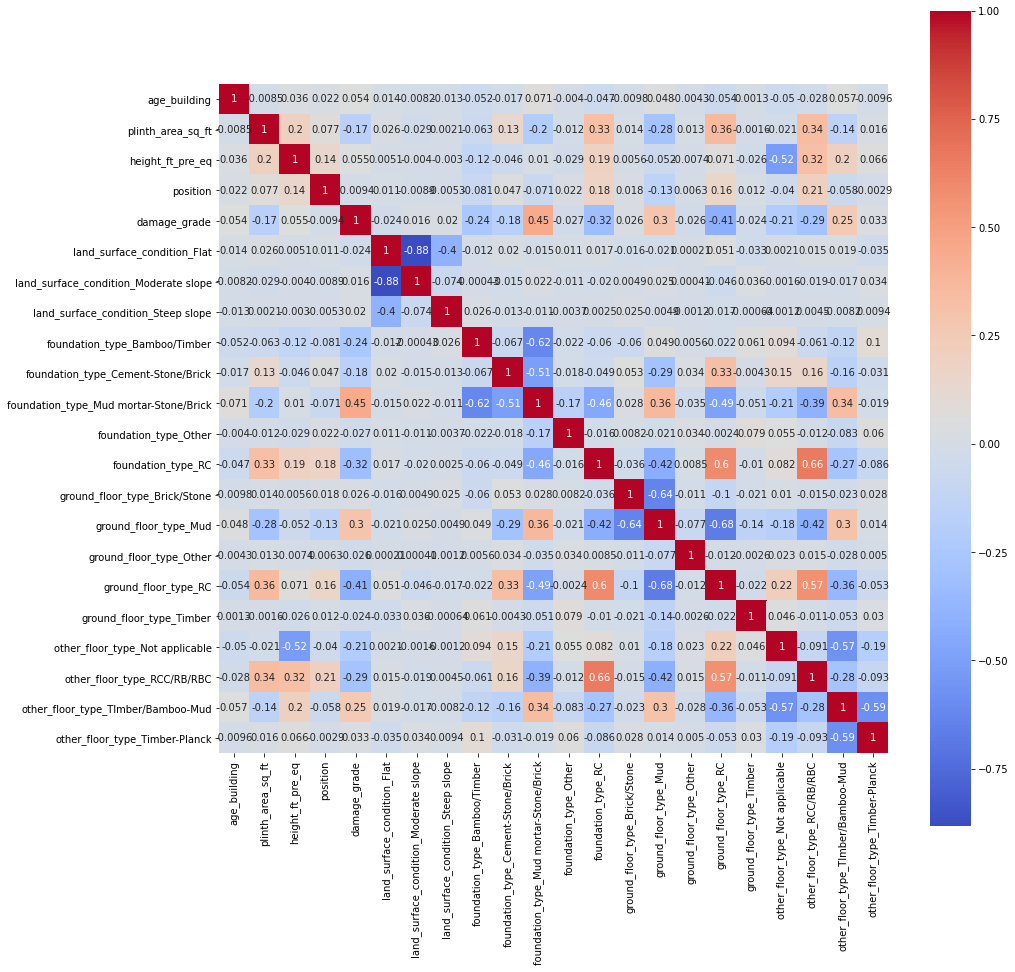

In [88]:
plt.figure(figsize=(15,15))
p = sns.heatmap(data3.corr(),cmap="coolwarm",annot=True, square =True)

In [89]:
x = data3.drop(['damage_grade'], axis=1)
y = data3.iloc[:, 4]

x = np.array(x).astype('float32')
y = np.array(y).astype('float32')

In [90]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
x_scale = scaler_x.fit_transform(x)

scaler_y = StandardScaler()
y_scale = scaler_y.fit_transform(y.reshape(-1,1))

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scale,y_scale,test_size = 0.2,random_state = 42)

In [92]:
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [93]:
# 모델 정의
model = Sequential()
model.add(Dense(50,input_dim=21))
model.add(Activation('relu'))

model.add(Dense(180))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(180))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(50))
model.add(Activation('linear'))

model.add(Dense(1))

# 모델 컴파일
model.compile(loss='mse',optimizer='adam')

# 모델 요약
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                1100      
_________________________________________________________________
activation_4 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 180)               9180      
_________________________________________________________________
activation_5 (Activation)    (None, 180)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 180)               32580     
_________________________________________________________________
activation_6 (Activation)    (None, 180)              

In [50]:
# 모델 학습
hist = model.fit(x_train, y_train, epochs= 50, batch_size = 20, validation_split= 0.2)
#에러가 뜬것 같지만 작동은 잘되고 제출을 위해 잠시 중단한것이므로 문제가 없음.

Epoch 1/50
2439/2439 [==============================] - 16s 6ms/step - loss: 0.7219 - val_loss: 0.7025
Epoch 2/50
2439/2439 [==============================] - 14s 6ms/step - loss: 0.7077 - val_loss: 0.7119
Epoch 3/50
2439/2439 [==============================] - 15s 6ms/step - loss: 0.7041 - val_loss: 0.7009
Epoch 4/50
2439/2439 [==============================] - 16s 7ms/step - loss: 0.7022 - val_loss: 0.7012
Epoch 5/50
2439/2439 [==============================] - 15s 6ms/step - loss: 0.7016 - val_loss: 0.7098
Epoch 6/50
2439/2439 [==============================] - 15s 6ms/step - loss: 0.6997 - val_loss: 0.7007
Epoch 7/50
2439/2439 [==============================] - 14s 6ms/step - loss: 0.6990 - val_loss: 0.7036
Epoch 8/50
2439/2439 [==============================] - 15s 6ms/step - loss: 0.6981 - val_loss: 0.6954
Epoch 9/50
2439/2439 [==============================] - 15s 6ms/step - loss: 0.6977 - val_loss: 0.6962
Epoch 10/50
2439/2439 [==============================] - 15s 6ms/step - l

KeyboardInterrupt: ignored

In [ ]:
# 학습 결과 그래프 출력
def modelplot(history, data, val_data):
  plt.plot(history.history[data])
  plt.plot(history.history[val_data])
  plt.title('Model'+ data)
  plt.ylabel(data)
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()

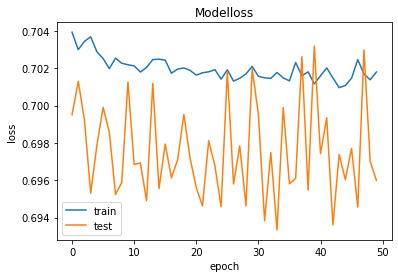

In [ ]:
# 학습 데이터 손실, 테스트 데이터 손실 출력
modelplot(hist, 'loss', 'val_loss')

In [ ]:
# 테스트 데이터를 모델에 대입하여 RMSE, MSE, MAE 출력
y_pred = model.predict(x_test)

y_pred_orig = scaler_y.inverse_transform(y_pred)
y_test_orig = scaler_y.inverse_transform(y_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_pred_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_pred_orig)
MAE = mean_absolute_error(y_test_orig, y_pred_orig)

print('RMSE =',RMSE, 
      '\nMSE =',MSE, 
      '\nMAE =',MAE)

RMSE = 1.12 
MSE = 1.2551687 
MAE = 0.9157241


In [94]:
# 모델 정의
model = Sequential()
model.add(Dense(50,input_dim=21))
model.add(Activation('relu'))

model.add(Dense(180))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(180))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(50))
model.add(Activation('linear'))

model.add(Dense(1))

# 모델 컴파일
model.compile(loss='mse',optimizer='adam')

# 모델 요약
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 50)                1100      
_________________________________________________________________
activation_8 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 180)               9180      
_________________________________________________________________
activation_9 (Activation)    (None, 180)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 180)               32580     
_________________________________________________________________
activation_10 (Activation)   (None, 180)              

In [95]:
# 모델 학습
hist = model.fit(x_train, y_train, epochs= 50, batch_size = 200, validation_split= 0.2)

Epoch 1/50
2439/2439 [==============================] - 16s 6ms/step - loss: 0.7210 - val_loss: 0.7015
Epoch 2/50
2439/2439 [==============================] - 15s 6ms/step - loss: 0.7071 - val_loss: 0.7029
Epoch 3/50
2439/2439 [==============================] - 15s 6ms/step - loss: 0.7042 - val_loss: 0.6991
Epoch 4/50
2439/2439 [==============================] - 15s 6ms/step - loss: 0.7020 - val_loss: 0.7023
Epoch 5/50
2439/2439 [==============================] - 15s 6ms/step - loss: 0.7007 - val_loss: 0.7082
Epoch 6/50
2439/2439 [==============================] - 15s 6ms/step - loss: 0.6995 - val_loss: 0.7013
Epoch 7/50
2439/2439 [==============================] - 15s 6ms/step - loss: 0.6985 - val_loss: 0.7012
Epoch 8/50
2439/2439 [==============================] - 15s 6ms/step - loss: 0.6979 - val_loss: 0.6978
Epoch 9/50
2439/2439 [==============================] - 15s 6ms/step - loss: 0.6976 - val_loss: 0.7012
Epoch 10/50
2439/2439 [==============================] - 16s 6ms/step - l

In [96]:
# 학습 결과 그래프 출력
def modelplot(history, data, val_data):
  plt.plot(history.history[data])
  plt.plot(history.history[val_data])
  plt.title('Model'+ data)
  plt.ylabel(data)
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()

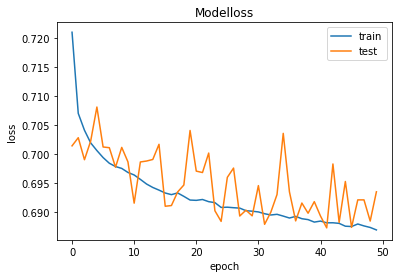

In [97]:
# 학습 데이터 손실, 테스트 데이터 손실 출력
modelplot(hist, 'loss', 'val_loss')

In [98]:
# 테스트 데이터를 모델에 대입하여 RMSE, MSE, MAE 출력
y_pred = model.predict(x_test)

y_pred_orig = scaler_y.inverse_transform(y_pred)
y_test_orig = scaler_y.inverse_transform(y_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_pred_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_pred_orig)
MAE = mean_absolute_error(y_test_orig, y_pred_orig)

print('RMSE =',RMSE, 
      '\nMSE =',MSE, 
      '\nMAE =',MAE)

RMSE = 1.119 
MSE = 1.2515635 
MAE = 0.9168156


## 6.머신러닝 모델과 비교
- 머신러닝 모델로는 RandomForestRegressor를 사용
- GridSearch(그리드서치)
  - 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도하여 최적의 매개변수를 찾는 방법
  - 매개변수를 튜닝하여 일반화 성능을 개선해줌

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# 파라미터 그리드 생성 
param_grid = {
    'bootstrap': [True],              # 학습셋 중 무작위로 중복 허용하여 데이터 선택
    'max_depth': [4, 5, 6, 7],        # 트리 최대 깊이
    'max_features': [2, 3, 4],        # 트리 학습에 사용할 최대 피처 수
    'min_samples_leaf': [2, 3, 4],    # 최소 샘플 리프 수
    'min_samples_split': [3, 4, 5],   # 최소 분할 샘플 수
    'n_estimators': [10, 30, 50, 100] # 생성할 트리의 개수
}

# 베이스 모델 정의
rf = RandomForestRegressor(criterion='mse')

# 그리드 서치 모델 인스턴스화
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 4)

In [ ]:
# 그리드 서치 모델 학습
grid_search_rf.fit(x_train,y_train)

# 최적 파라미터 출력
grid_search_rf.best_params_

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed: 19.5min


In [ ]:
# 테스트 데이터를 모델에 대입하여 RMSE, MSE, MAE 출력
y_pred = grid_search_rf.predict(x_test)

y_pred_orig = scaler_y.inverse_transform(y_pred)
y_test_orig = scaler_y.inverse_transform(y_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_pred_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_pred_orig)
MAE = mean_absolute_error(y_test_orig, y_pred_orig)

print('RMSE =',RMSE, 
      '\nMSE =',MSE, 
      '\nMAE =',MAE)